# Modeling a Pin-Cell

This notebook is intended to demonstrate the basic features of the ROBIN3 [Python API](../pythonapi/index.rst) for simulating a single pin-cell.

In [8]:
%matplotlib inline
import robin3
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
robin3.config.USE_TQDM_NOTEBOOK = True

## Defining Material

ROBIN3 builds everything by json object on the C++ side, in Python API, as a result, dict is used to defining the [input model](../io_formats/input.rst).

We create a 3.2% enriched UO2 material by defining a [material](../io_formats/input.rst#material-object) as following:

In [9]:
uo2 = {
    "name": "fuel_material",
    "elements": ["UO2_3.2"],
    "weight_percents": [1.0],
    "density": 10.3
}

If we want to check some properties of this material, initialize an instance of [robin3.Material](../pythonapi/generated/robin3.Material.rst) first.

In [10]:
fuel_material = robin3.Material(**uo2)
print(fuel_material)

{"name": "fuel_material", "elements": ["UO2_3.2"], "weight_percents": [1.0], "density": 10.3, "temperature": 300.0}


Getting the nuclide number densities of the material:

In [11]:
fuel_material.get_nuclide_number_densities()

{'O-nat': 0.04595658070478715,
 'U-234': 6.696102045887972e-06,
 'U-235': 0.0007444032936464394,
 'U-236': 2.553124363502971e-07,
 'U-238': 0.022226935644264895}

Check some properties of the material:

In [12]:
print(fuel_material.burnable)
print(fuel_material.fissionable)
print(fuel_material.resonant)

True
True
True


Getting macro cross sections by a pandas.DataFrame of the material:

In [13]:
fuel_material.get_macro_xs_df()

,sigma_tr,sigma_a,sigma_f,nu_sigma_f,kappa_sigma_f,fission_spectrum,sigma_s_0,sigma_s_1,sigma_s_2,sigma_s_3,...,sigma_s_59,sigma_s_60,sigma_s_61,sigma_s_62,sigma_s_63,sigma_s_64,sigma_s_65,sigma_s_66,sigma_s_67,sigma_s_68
0,0.119184,0.012585,0.020958,0.072252,7.105252e-13,0.0,3.159596e-02,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.146001,0.015434,0.013187,0.039726,4.469153e-13,0.0,1.862190e-02,5.383377e-02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.158445,0.013446,0.012912,0.035026,4.373982e-13,0.0,3.393560e-03,2.740894e-02,7.754107e-02,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.188521,0.011830,0.010429,0.027329,3.529706e-13,0.0,9.453208e-03,5.438475e-03,1.760073e-02,9.766610e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.270990,0.004046,0.001472,0.003759,4.864680e-14,0.0,1.327141e-02,1.079639e-02,1.459137e-02,3.510724e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.258655,0.003588,0.000877,0.002189,2.848764e-14,0.0,1.193457e-02,1.253479e-02,1.433846e-02,1.642592e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.380121,0.003482,0.000904,0.002240,2.931401e-14,0.0,8.433410e-03,1.003594e-02,1.054309e-02,1.486861e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0.380484,0.003844,0.000964,0.002383,3.127783e-14,0.0,4.990844e-03,5.847141e-03,5.842723e-03,7.125904e-03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.393930,0.004571,0.001075,0.002638,3.487343e-14,0.0,2.589751e-03,2.748531e-03,2.671260e-03,3.257228e-03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,0.423306,0.005982,0.001203,0.002927,3.900023e-14,0.0,1.235290e-03,1.147286e-03,1.108276e-03,1.332677e-03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Plotting macro cross sections with neutron energy:

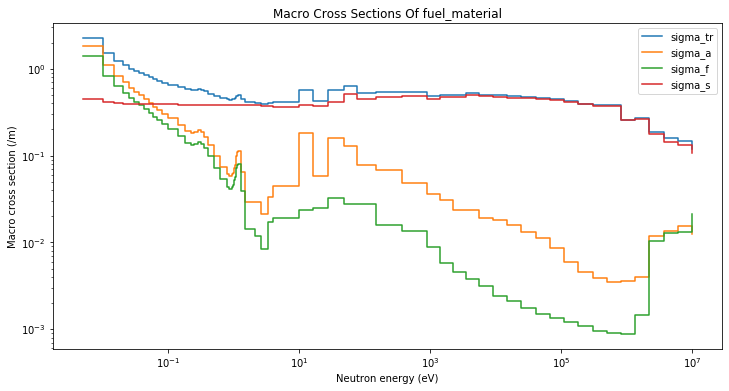

In [14]:
fig = fuel_material.plot_macro_xs()

## Defining Pin Structure 

We can create a pin [structure](../io_formats/input.rst#structure-object) as follows:

In [15]:
pin = {
    "name": "pin",
    "primitives": [
        {"type": "CIRCLE", "radius": 0.47},
        {"type": "CIRCLE", "radius": 0.50}
    ],
    "regions": [
        {"material": "fuel_material", "space": "1"},
        {"material": "ZIRLO", "space": "2-1"}
    ]
}

Note here "ZIRLO" is pre-defined in ROBIN3's [material databank file](../io_formats/materialdb.rst), which can be inspected by [robin3.get_predefined_materials](../pythonapi/generated/robin3.get_predefined_materials.rst) as well.

## Defining Assembly

Assembly is a required input object in ROBIN3. We have to define an [assembly](../io_formats/input.rst#assembly-object) in spite of we just want to simulate a single pin cell, here the assembly can only have a single pin cell:

In [16]:
assembly = {
    "name": "single_pin_assembly",
    "type": "SQUARE",
    "pitch": 1.26,
    "cell_pitch": 1.26,
    "cell_map": ["pin"]
}

## Defining State Points

[State points](../io_formats/input.rst#state-points-object) is required for micro xs cases:

In [17]:
state_points = {
    "boron_concentration": 500,
    "moderator_temperature": 577,
    "fuel_temperature": 903,
    "system_pressure": 15.51
}

## Composing a Input Model

The full [input model](../io_formats/input.rst) for a typical single assembly micro xs case includes following parts:
    1. materials;
    2. structures;
    3. assemblies;
    4. state points.

In [18]:
model = {
    "materials": [uo2],
    "structures": [pin],
    "assemblies": [assembly],
    "state_points": state_points
}

## Visualizing Input Model

Instantiates a [robin3.Plotter](../pythonapi/generated/robin3.Plotter.rst) to visualize the model

In [19]:
plotter = robin3.Plotter(model)

Display our single pin cell assembly:

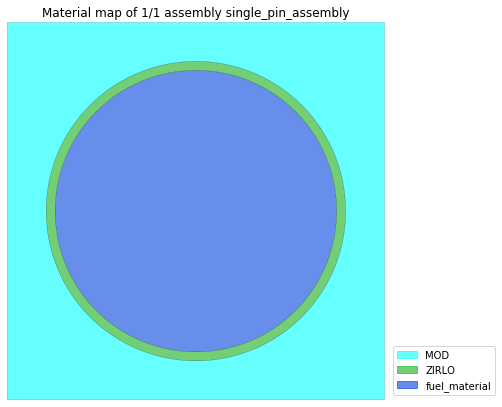

In [20]:
fig = plotter.plot_geometry()

Display our single pin cell assembly with MOC meshing:

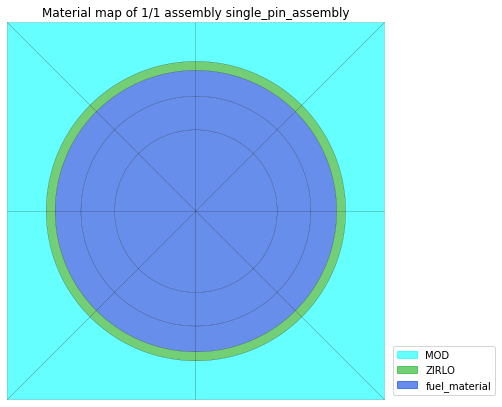

In [21]:
fig = plotter.plot_geometry(show_meshes=True)

Display flat source regions:

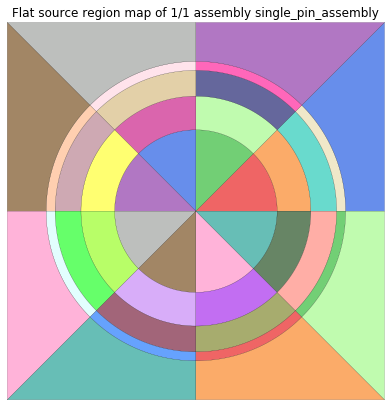

In [22]:
fig = plotter.plot_flat_source_regions()

## Run ROBIN3

Running ROBIN3 from Python can be done using the [robin3.run()](../pythonapi/generated/robin3.run.rst) function. This function allows you to use GPU by setting use_GPU=True if it needed, GPU will significantly reduce the running time.

In [23]:
result = robin3.run(model)

In [24]:
print(result)

The [robin3.run()](../pythonapi/generated/robin3.Plotter.rst) function return a [robin3.ResultProcessor](../pythonapi/generated/robin3.ResultProcessor.rst) instance. All the result data can be accessed by the result_data attribute, and the result data are saved by a HDF5 file.

In [25]:
print(result.result_file)
print(result.result_data)

/home/ghchen/Nustar/projects/robin3/docs/source/examples/single_pin_assembly.h5
{'DEP__BASE__BU_000.000': {'absolute_flux_factor': 1059486430860.9441, 'assembly_name': 'single_pin_assembly', 'assembly_pitch': 1.26, 'assembly_type': 'SQUARE', 'assembly_volume': 1.587600000000001, 'average_neutron_generation_time': 1.6695884583444988e-05, 'beta_effective': array([0.00020353, 0.00142   , 0.00132653, 0.00276283, 0.0009608 ,
       0.00034139], dtype=float32), 'bor': 500.0, 'boundary_condition': 'REFLECTIVE', 'boundary_current': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0

## Result Visualization

Result visualization from Python can be done using a [robin3.Plotter](../pythonapi/generated/robin3.Plotter.rst) instance generate by [ResultProcessor](../pythonapi/generated/robin3.ResultProcessor.rst)'s method generate_plotter.

In [26]:
plotter = result.generate_plotter()

We can plot input model here as well:

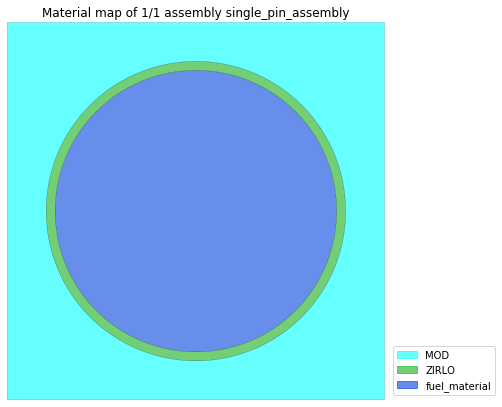

In [27]:
fig = plotter.plot_geometry()

Many result items can be displayed by the [robin3.Plotter](../pythonapi/generated/robin3.Plotter.rst). For example, we can plot the mesh flux distribution by plot_mesh_flux method, here the argument group means the neutron flux in which enery group to show after editing .

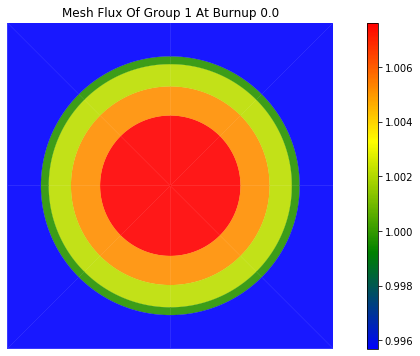

In [28]:
fig = plotter.plot_mesh_flux(group=1, show_peak_value=False)

If we set show_peak_value=True (True as default), here the peak mesh flux in the center of circle will be rendered black:

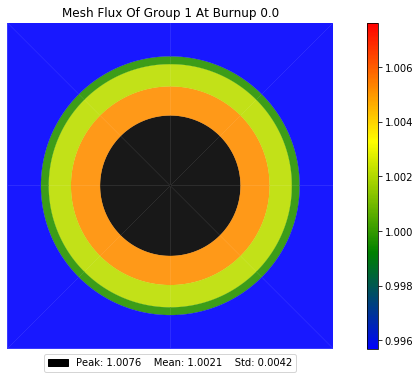

In [29]:
fig = plotter.plot_mesh_flux(group=1)